# Stable Diffusion - running it from Jupyter Notebook

## Positive Prompt
high-resolution digital painting of a mystical forest transforming at twilight. The style is surreal and ethereal, reminiscent of the Romanticism era, emphasizing the sublime beauty of nature. The scene features glowing flowers, ethereal lights, and subtly visible mythical creatures. The color palette consists of twilight hues â purples, blues, and soft pinks, with glowing accents. Lighting is soft and ethereal, highlighting the magical transformation of the forest under the moonlight.

## Negative prompt
text, watermark, low quality, medium quality, blurry, censored, wrinkles, deformed, mutated text, watermark, low quality, medium quality, blurry, censored, wrinkles, deformed, mutated BadDream FastNegativeV2

## Model and Parameter Detail

- Model: dreamshaperXL_turboDpmppSDE
- Sampler: DPM++ SDE Karras
- Hires upscaler: 8x_NMKD-Superscale_150000_G, Hires steps: 10, Hires upscale: 1.5
- Steps: 5, Size: 768x1024, Seed: 1325615396,  Version: v1.7.0, CFG scale: 2

In [1]:
%pip install -qU torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
%pip install -qU peft
%pip install -qU diffusers
%pip install -qU huggingface_hub
%pip install -qU ipywidgets
%pip install -qU accelerate
%pip install -qU transformers


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note

In [2]:
from huggingface_hub import notebook_login
notebook_login()

In [3]:
from diffusers import AutoPipelineForText2Image, DPMSolverMultistepScheduler
import torch

pipe = AutoPipelineForText2Image.from_pretrained('lykon/dreamshaper-xl-v2-turbo', torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

prompt = """high-resolution digital painting of a mystical forest transforming at twilight. style: surreal and ethereal, reminiscent of the Romanticism era, sublime beauty of nature. scene: glowing flowers, ethereal lights, and subtly visible mythical creatures. color palette: twilight hues - purples, blues, soft pinks, with glowing accents. lighting: soft and ethereal, moonlit forest."""

generator = torch.manual_seed(0)


/home/donbr/visionary_storytelling/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model_index.json:   0%|          | 0.00/671 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/558 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

/home/donbr/visionary_storytelling/.venv/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


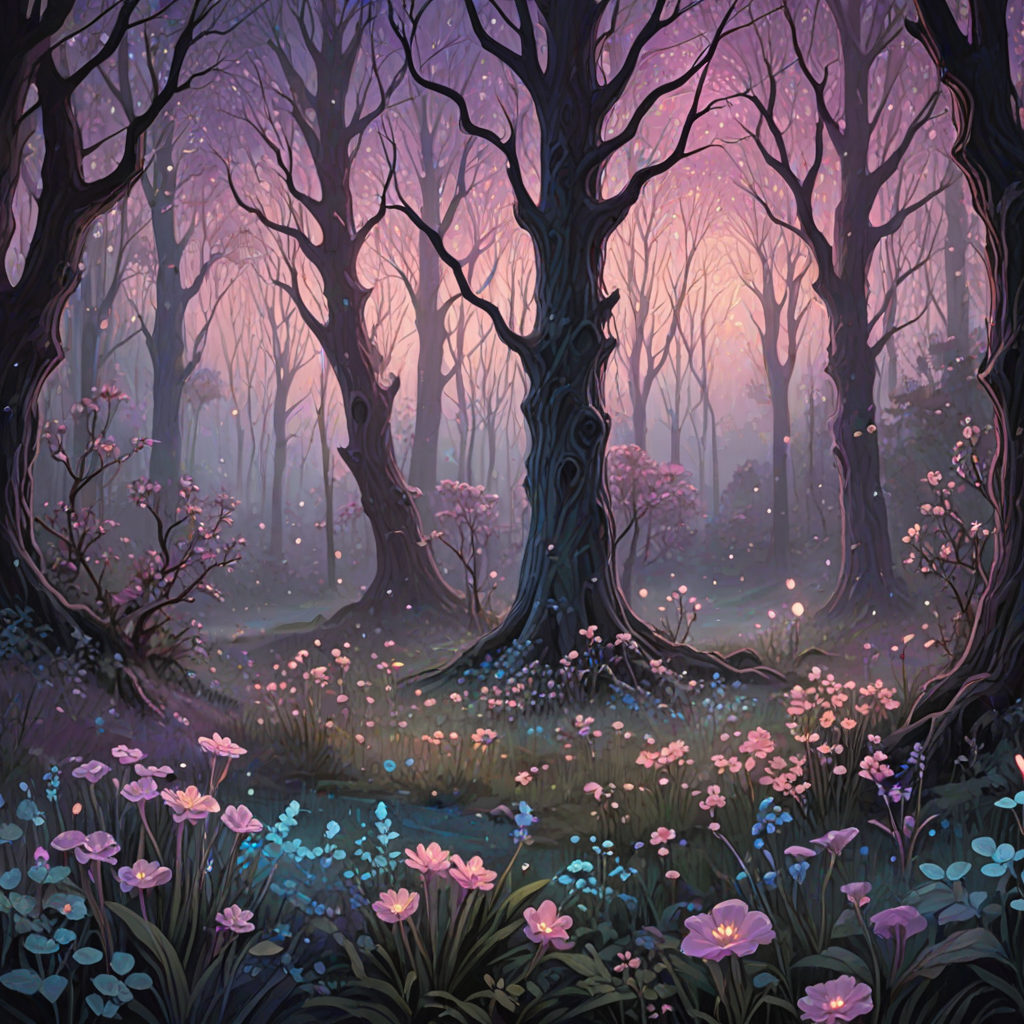

In [4]:
image = pipe(prompt, num_inference_steps=6, guidance_scale=2).images[0]  
image